# The top 100 best-performing companies of 2019

In this notebook I'm gathering information on the top 100 best-performing companies of 2019. The data is available on ceoworld.biz, to gather the data and get it into a suitable format I'm using Pyhton's Beautiful Soup library  for webscraping. After some datacleaning the data is ready to analyze and visualize, here using I'm Pandas, Matplotlib, Seaborn and SciPy.

## 1. Data scraping with BeautifulSoup & data cleaning 

In [2]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
# this line is needed to display plots in jupyter notebooks
%matplotlib inline
#used to open URLs
import urllib.request
#used to extract data from html files
from bs4 import BeautifulSoup
import csv

In [3]:
# specify the url
urlpage =  'https://ceoworld.biz/2019/06/28/the-top-100-best-performing-companies-in-the-world-2019/'
print(urlpage)
# query the website and return the html to the variable 'page'
page = urllib.request.urlopen(urlpage)
# parse the html using beautiful soup and store in variable 'soup'
soup = BeautifulSoup(page, 'html.parser')
# find results within table
table = soup.find('table', attrs={'id': 'tablepress-312'})
results = table.find_all('tr')
#checking the number of rows - should correspond to number of rows
# in table + header
print('Number of results', len(results))

https://ceoworld.biz/2019/06/28/the-top-100-best-performing-companies-in-the-world-2019/
Number of results 101


In [4]:
#printing the header and the first row of results
print(results[:2])

[<tr class="row-1 odd"><th class="column-1">Rank</th><th class="column-2">Company</th><th class="column-3">Market value</th><th class="column-4"> Assets</th><th class="column-5"> Sales</th><th class="column-6"> Profits</th><th class="column-7">Country</th></tr>, <tr class="row-2 even"><td class="column-1">1</td><td class="column-2">Apple</td><td class="column-3">961.3</td><td class="column-4">373.7</td><td class="column-5">261.7</td><td class="column-6">59.4</td><td class="column-7">US</td></tr>]


In [10]:
# first creating an empty list to put in the results
rows = []
# adding the headers to the list
rows.append(['Rank', 'Company Name', 'Market Value', 'Assets', 'Sales', 'Profits', 'Country'])
print(rows)

[['Rank', 'Company Name', 'Market Value', 'Assets', 'Sales', 'Profits', 'Country']]


In [11]:
# loop over results
for result in results:
    # find all columns per result
    data = result.find_all('td')
    # check that columns have data
    if len(data) == 0:
        continue

   # get the text from each column and write this to a variable
    rank = data[0].getText()
    company = data[1].getText()
    marketval = data[2].getText()
    assets = data[3].getText()
    sales = data[4].getText()
    profits = data[5].getText()
    country = data[6].getText()
    
    
    # write each result to rows list already created, container the header
    rows.append([rank, company, marketval, assets, sales, profits, country])

    

In [12]:
# Create csv and write rows to output file
with open('top100companies.csv','w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

## 2. Data insights and visualization

In [3]:
#for easy visualization, reading in the previously generated data in pandas
topdata = pd.read_csv('top100companies.csv')
topdata.head(5)

,Rank,Company Name,Market Value,Assets,Sales,Profits,Country
0,1,Apple,961.3,373.7,261.7,59.4,US
1,2,Microsoft,946.5,258.9,118.2,33.5,US
2,3,Amazon,916.1,162.6,232.9,10.1,US
3,4,Alphabet,863.2,232.8,137.0,30.7,US
4,5,Berkshire Hathaway,516.4,707.8,247.8,4.0,US


Looking at the top 5 we note that these are all US-based companies. Is the US also dominating the rest of the top 100? 
Let's have look...

In [3]:
topdata.groupby('Country').Country.count()

Country
Australia        1
Belgium          1
Canada           2
China           12
Denmark          1
France           3
Germany          2
Hong Kong        2
India            2
Ireland          2
Japan            2
Netherlands      3
Saudi Arabia     1
South Africa     1
South Korea      1
Spain            1
Switzerland      3
Taiwan           1
UK               5
US              54
Name: Country, dtype: int64

Yes! The US dominates the top 100 with 54 companies

To get a better idea of the distribution worldwide lets visualize this, after first grouping some countries together:

In [4]:
# Using numpy select to create a new column based on selection so we can group countries
conditions = [topdata['Country'].eq('US'),topdata['Country'].eq('Australia'),topdata['Country'].eq('Canada'),topdata['Country'].isin(['Belgium','Denmark','France','Germany','Ireland','Netherlands','Spain','Switzerland','UK']),topdata['Country'].isin(['Hong Kong','India','Japan','South Korea','Taiwan']),topdata['Country'].isin(['Saudi Arabia','South Africa']),topdata['Country'].eq('China')]
topdata['Group'] = np.select(conditions,['USA','Australia','Canada','Europe','Asia','Africa&ME','China']).astype(str)

And now we can pour this data into a pie chart:

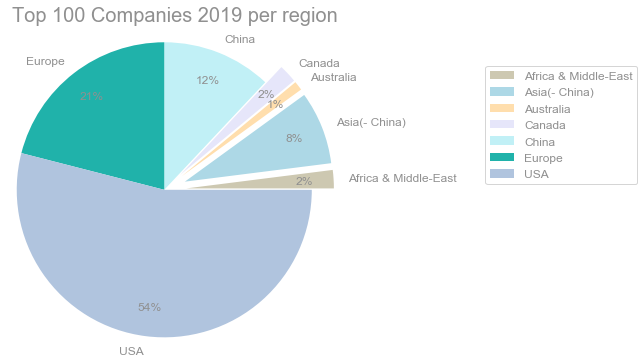

In [6]:
#formatting the chart to make it more esthetically pleasing
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize'] = [8, 8]
# see all X11 color names on https://en.wikipedia.org/wiki/X11_color_names
color_palette_list = ['#CDC8B1', '#ADD8E6', '#FFDEAD', '#E6E6FA',   
                      '#C1F0F6', '#20B2AA','#B0C4DE']
labels = ['Africa & Middle-East','Asia(- China)','Australia','Canada','China','Europe','USA']
percentages = topdata.groupby('Group').Group.count()
explode=(0.15,0.15,0.15,0.15,0,0,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,pctdistance=0.8,   
       labeldistance=1.1)
ax.axis('equal')
ax.set_title("Top 100 Companies 2019 per region", fontsize=20)
#formatting the legend
ax.legend(frameon=True, bbox_to_anchor=(1.9,0.9))

#A quick and dirty way to make a pie chart:
#pies = topdata.groupby('Group').Group.count()
#pies.plot.pie(figsize=(4,4))

The pie chart above tells us that most of the companies in the Top 100 are US-based, while Europe comes in second place and China third.

The ranking of the companies in the list is based on their total market value. The latter doesn't necessarily reflect the amount of profit each company made in 2019. Profits of domestic companies will contribute to the Gross Domestic Product (GDP) of that country, an important measure of a country's economical prosperity.

Let's have a look at how much profit these top 100 companies have generated per region in 2019.

In [7]:
profit_region = topdata.groupby('Group').Profits.sum()
profit_region = pd.DataFrame(profit_region)
profit_region

,Profits
Group,
Africa&ME,19.2
Asia,113.8
Australia,6.0
Canada,18.3
China,217.9
Europe,173.6
USA,630.0


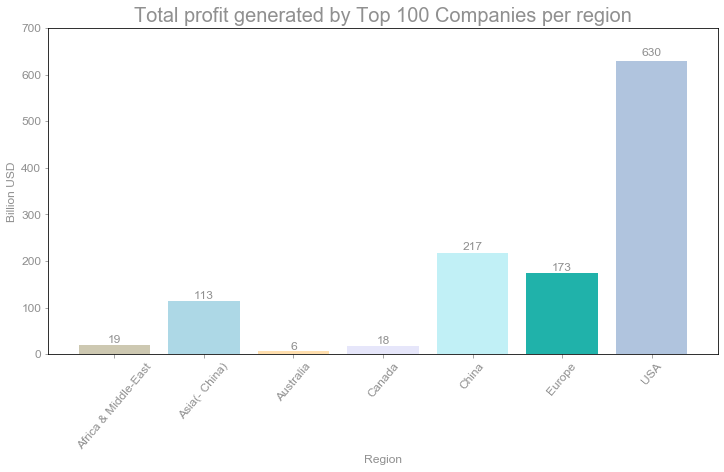

In [9]:
#formatting the chart 
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
plt.rcParams['axes.grid'] = False
color_palette_list = ['#CDC8B1', '#ADD8E6', '#FFDEAD', '#E6E6FA',   
                      '#C1F0F6', '#20B2AA','#B0C4DE']
ind = np.arange(len(profit_region['Profits']))

labels = ['Africa & Middle-East','Asia(- China)','Australia','Canada','China','Europe','USA']
bars1 = ax.bar(ind, profit_region['Profits'], 
        color = color_palette_list)
ax.set_title("Total profit generated by Top 100 Companies per region",fontsize=20)
ax.set_ylabel("Billion USD")
ax.set_ylim((0,700))
ax.set_xticks(range(0,len(ind)))
ax.set_xticklabels(labels, rotation=50)
ax.set_xlabel("Region")
#Puts labels on the bars
def autolabel(bars1, xpos='center'):

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for bars in bars1:
        height = int(bars.get_height())
        ax.text(bars.get_x() + bars.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(bars1, 'center')

Interestingly here we see that, altough compared to China, Europe has about double the amount of top rated companies in the list based on total market value - China surpases Europe in total profit generated by their top companies. Given the rapid pace at which the Chinese economy has grown over the last couple of years (6.1% GDP growth in 2019 vs 1.5% for Europe), this is probably not surprising.

Next, we have look at some distributions and possible correlations. The chart above shows total profit generated by the top companies, it doesn't show the distribution within one group: is each company generating about the same amount of profit and/or are there outliers that substantially bump up the total profit of one group?

Text(0, 0.5, 'Profit in Billion USD')

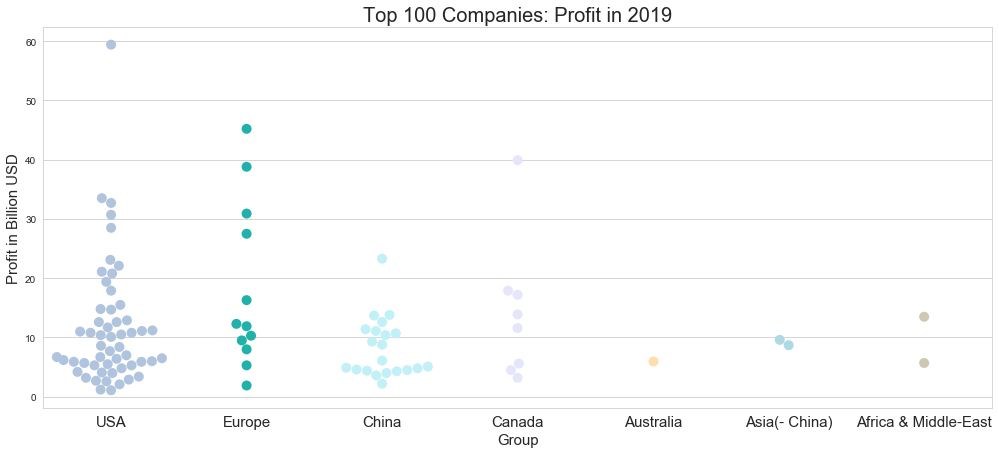

In [7]:
#Chart preparation
color_palette_list = ['#CDC8B1', '#ADD8E6', '#FFDEAD', '#E6E6FA',   
                      '#C1F0F6', '#20B2AA','#B0C4DE']
colors = color_palette_list[::-1]
labels = ['Africa & Middle-East','Asia(- China)','Australia','Canada','China','Europe','USA']
xlabels = labels[::-1]
sns.set_style("whitegrid")
sns.set_palette(colors)
plt.figure(figsize=(17,7))
plt.title("Top 100 Companies: Profit in 2019",fontsize=20)
plt.xlabel('Group',fontsize=15)

#plotting a swarmplot and adjusting the chart
g = sns.swarmplot(x=topdata['Group'], y=topdata['Profits'],s=10)
g.set_xticklabels(xlabels,fontsize=15)
plt.ylabel('Profit in Billion USD',fontsize=15)

Here we see that most companies are generating profits between 0 and 20 Billion USD, while the USA, Europe and Canada have some top performers generating more than 35 Billion USD in profit each. 

Another interesting thing to look at is how profit is correlated to sales: are the companies that are generating the largest revenues also earning the most profit?

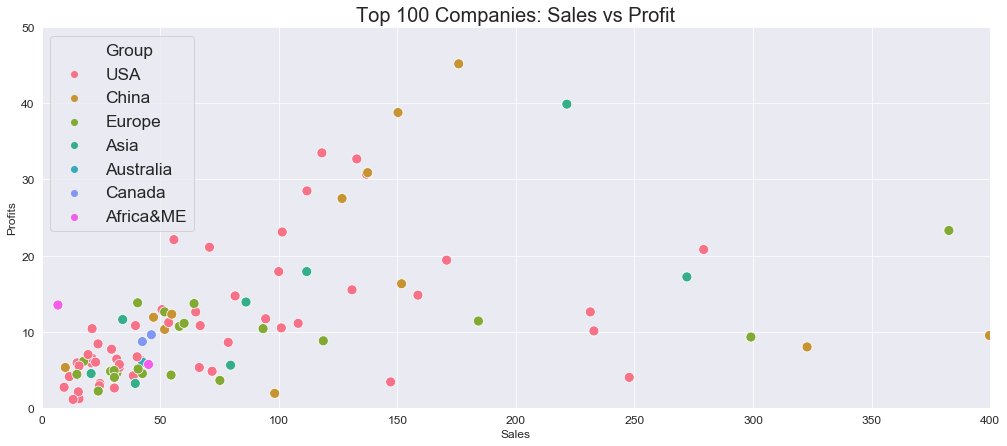

In [29]:
#Chart preparation
sns.set_style("darkgrid")
sns.set_palette("husl")
plt.figure(figsize=(17,7))
plt.title("Top 100 Companies: Sales vs Profit",fontsize=20)

#plotting and adjusting the chart
g = sns.scatterplot(data= topdata, x=topdata['Sales'], y=topdata['Profits'], hue=topdata['Group'],s=100)
#g = sns.lmplot(data= topdata, x='Sales', y='Profits', hue='Group')
g.set_xlim((0,400))
g.set_ylim((0,50))
plt.legend(fontsize='x-large', title_fontsize='40')

Looking at this scatter plot we can't pick up on a clear correlation.
However, to get a better insight into a possible correlation, it's more useful to do a linear regression analysis. Here we create a regression plot in Seaborn and calculate the equation of the regression line and correlation coefficient using SciPy. This should give us a better idea:


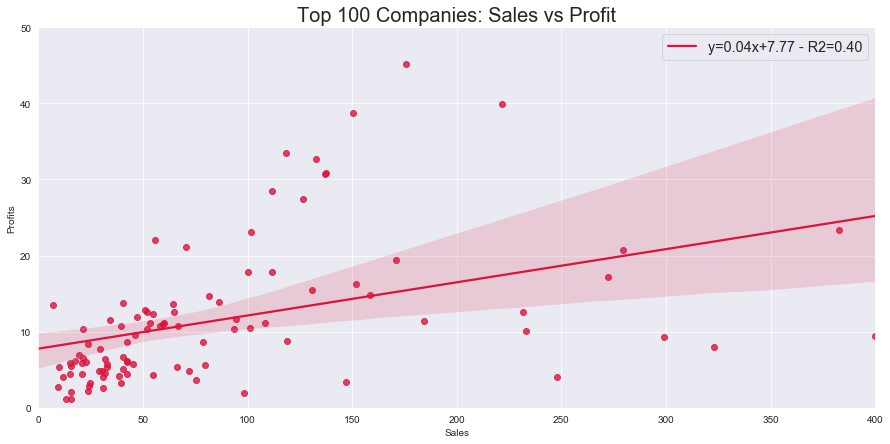

In [12]:
from scipy import stats

#Chart preparation
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
plt.title("Top 100 Companies: Sales vs Profit",fontsize=20)


slope, intercept, r_value, p_value, std_err = stats.linregress(topdata['Sales'],topdata['Profits'])

#plotting and adjusting the chart
g = sns.regplot(x=topdata['Sales'], y=topdata['Profits'],truncate = False, color='#DC143C',line_kws={'label':"y={0:.2f}x+{1:.2f} - R2={2:0.2f}".format(slope,intercept,r_value)})
g.set_xlim((0,400))
g.set_ylim((0,50))

plt.legend(fontsize='x-large', title_fontsize='20')


Looking both at the regression line and the equation in the top right corner we can conclude that there is a weak positive correlation between Sales and Profit in this dataset.

Since we are looking at the entire dataset in the graph above, let's see if we get a different picture looking only at companies in the US and China seperately. For this we can use an lmplot in Seaborn, which is a 2D scatterplot, overlaid with a regression line per group. 
We are again using SciPy to perform linear regression analysis and get the equation of each regression line and the R squared to evaulate strength of the correlation.


Text(28.95480902777779, 0.5, 'Market Value in $1B')

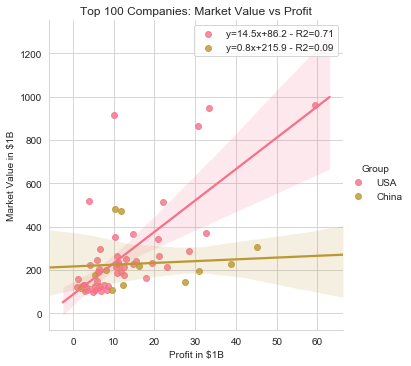

In [14]:
#creating a subset of the data
subset=topdata.loc[(topdata.Group=='USA') |(topdata.Group=='China')]

#Setting the chart style
sns.set_style("whitegrid")
sns.set_palette("husl")

#plotting an lmplot
g = sns.lmplot(y="Market Value", x="Profits",data = subset, hue="Group")

#using scipy to get linear regression equations
subset1=topdata.loc[(topdata.Group=='USA')]
subset2=topdata.loc[(topdata.Group=='China')]
ax = g.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(subset1["Profits"],subset1["Market Value"])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(subset2["Profits"],subset2["Market Value"])
label_line_1 = r'y={0:.1f}x+{1:.1f} - R2={2:0.2f}'.format(slope1,intercept1,r_value1)
label_line_2 = r'y={0:.1f}x+{1:.1f} - R2={2:0.2f}'.format(slope2,intercept2,r_value2)

#adding more labels
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)
ax.title.set_text("Top 100 Companies: Market Value vs Profit")
ax.set_xlabel("Profit in $1B")
ax.set_ylabel("Market Value in $1B")



The analysis above shows there is no correlation between market value and profit for Chinese companies, while we see a strong correlation for US-based companies. However, when we look at the scatterplot, the linear relationships are not very obvious, making the results from linear regression analysis less reliable, so we should be carefull drawing conclusions. Here it would be ideal to get more data points for each group so we might be able to see a more clear pattern in the scatterplot, and get a more reliable result from our regression analysis! 